## Proyecto final
---

### Predicción en el diagnóstico de diabetes

Fuente de datos: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Importacion de datos

In [6]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Diccionario:

* Pregnancies: Cantidad de embarazos por persona
* Glucose: Nivel de glucosa en la sangre
* BloodPressure: Medición de presión sanguínea
* SkinThickness: Grosor de la piel
* Insulin: nivel de insulina en la sangre
* BMI: Índice de masa corporal
* DiabetesPedigreeFunction: Probabilidad de padecer diabeter por historial familiar
* Age: Edad
* Outcome: Resultado. 
  * 1: tiene diabetes
  * 0: no tiene diabetes

Forma del dataframe

In [7]:
diabetes.shape

(768, 9)

Todas las columnas tienen tipos acorde a sus valores

In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Se observa que existen mínimos de 0 para el nivel de glucosa, presión arterial, grosor de la piel, nivel de insulina e índice de masa corporal. Se analizará esta información más adelante.

Se revisan si existen NA en el dataset

In [10]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

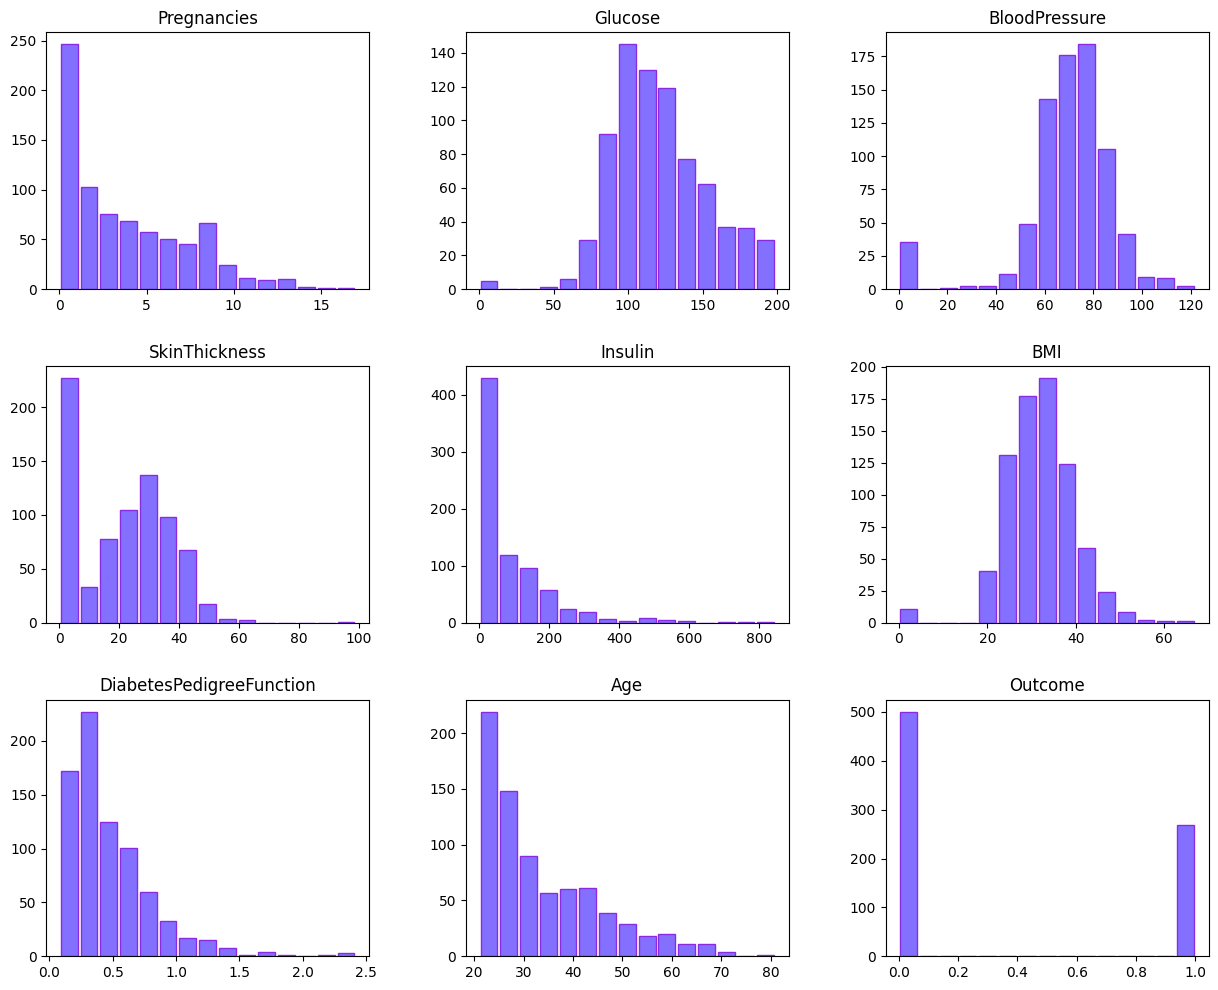

In [11]:
diabetes.hist(grid=False, bins=15,figsize=(15,12), rwidth=0.85, color="#8470FF", ec="blueviolet")

In [12]:
corr = diabetes.corr()
corr

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

<Axes: >

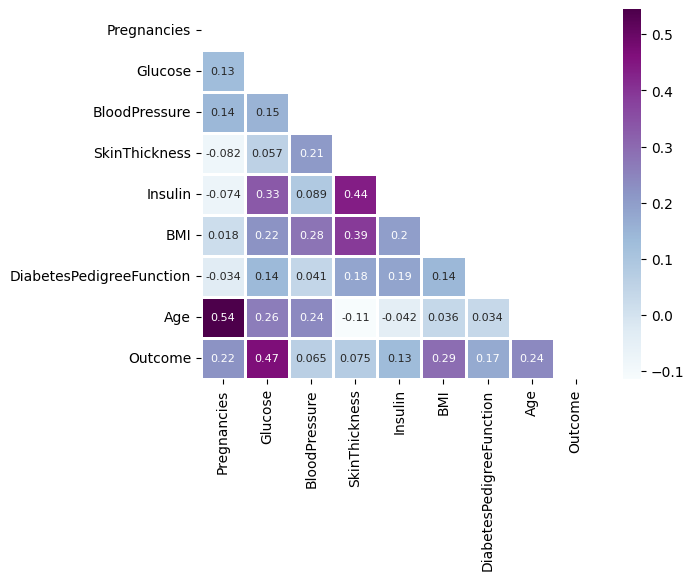

In [13]:
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, linewidths=0.75, annot=True, cmap="BuPu", annot_kws={"size":8})

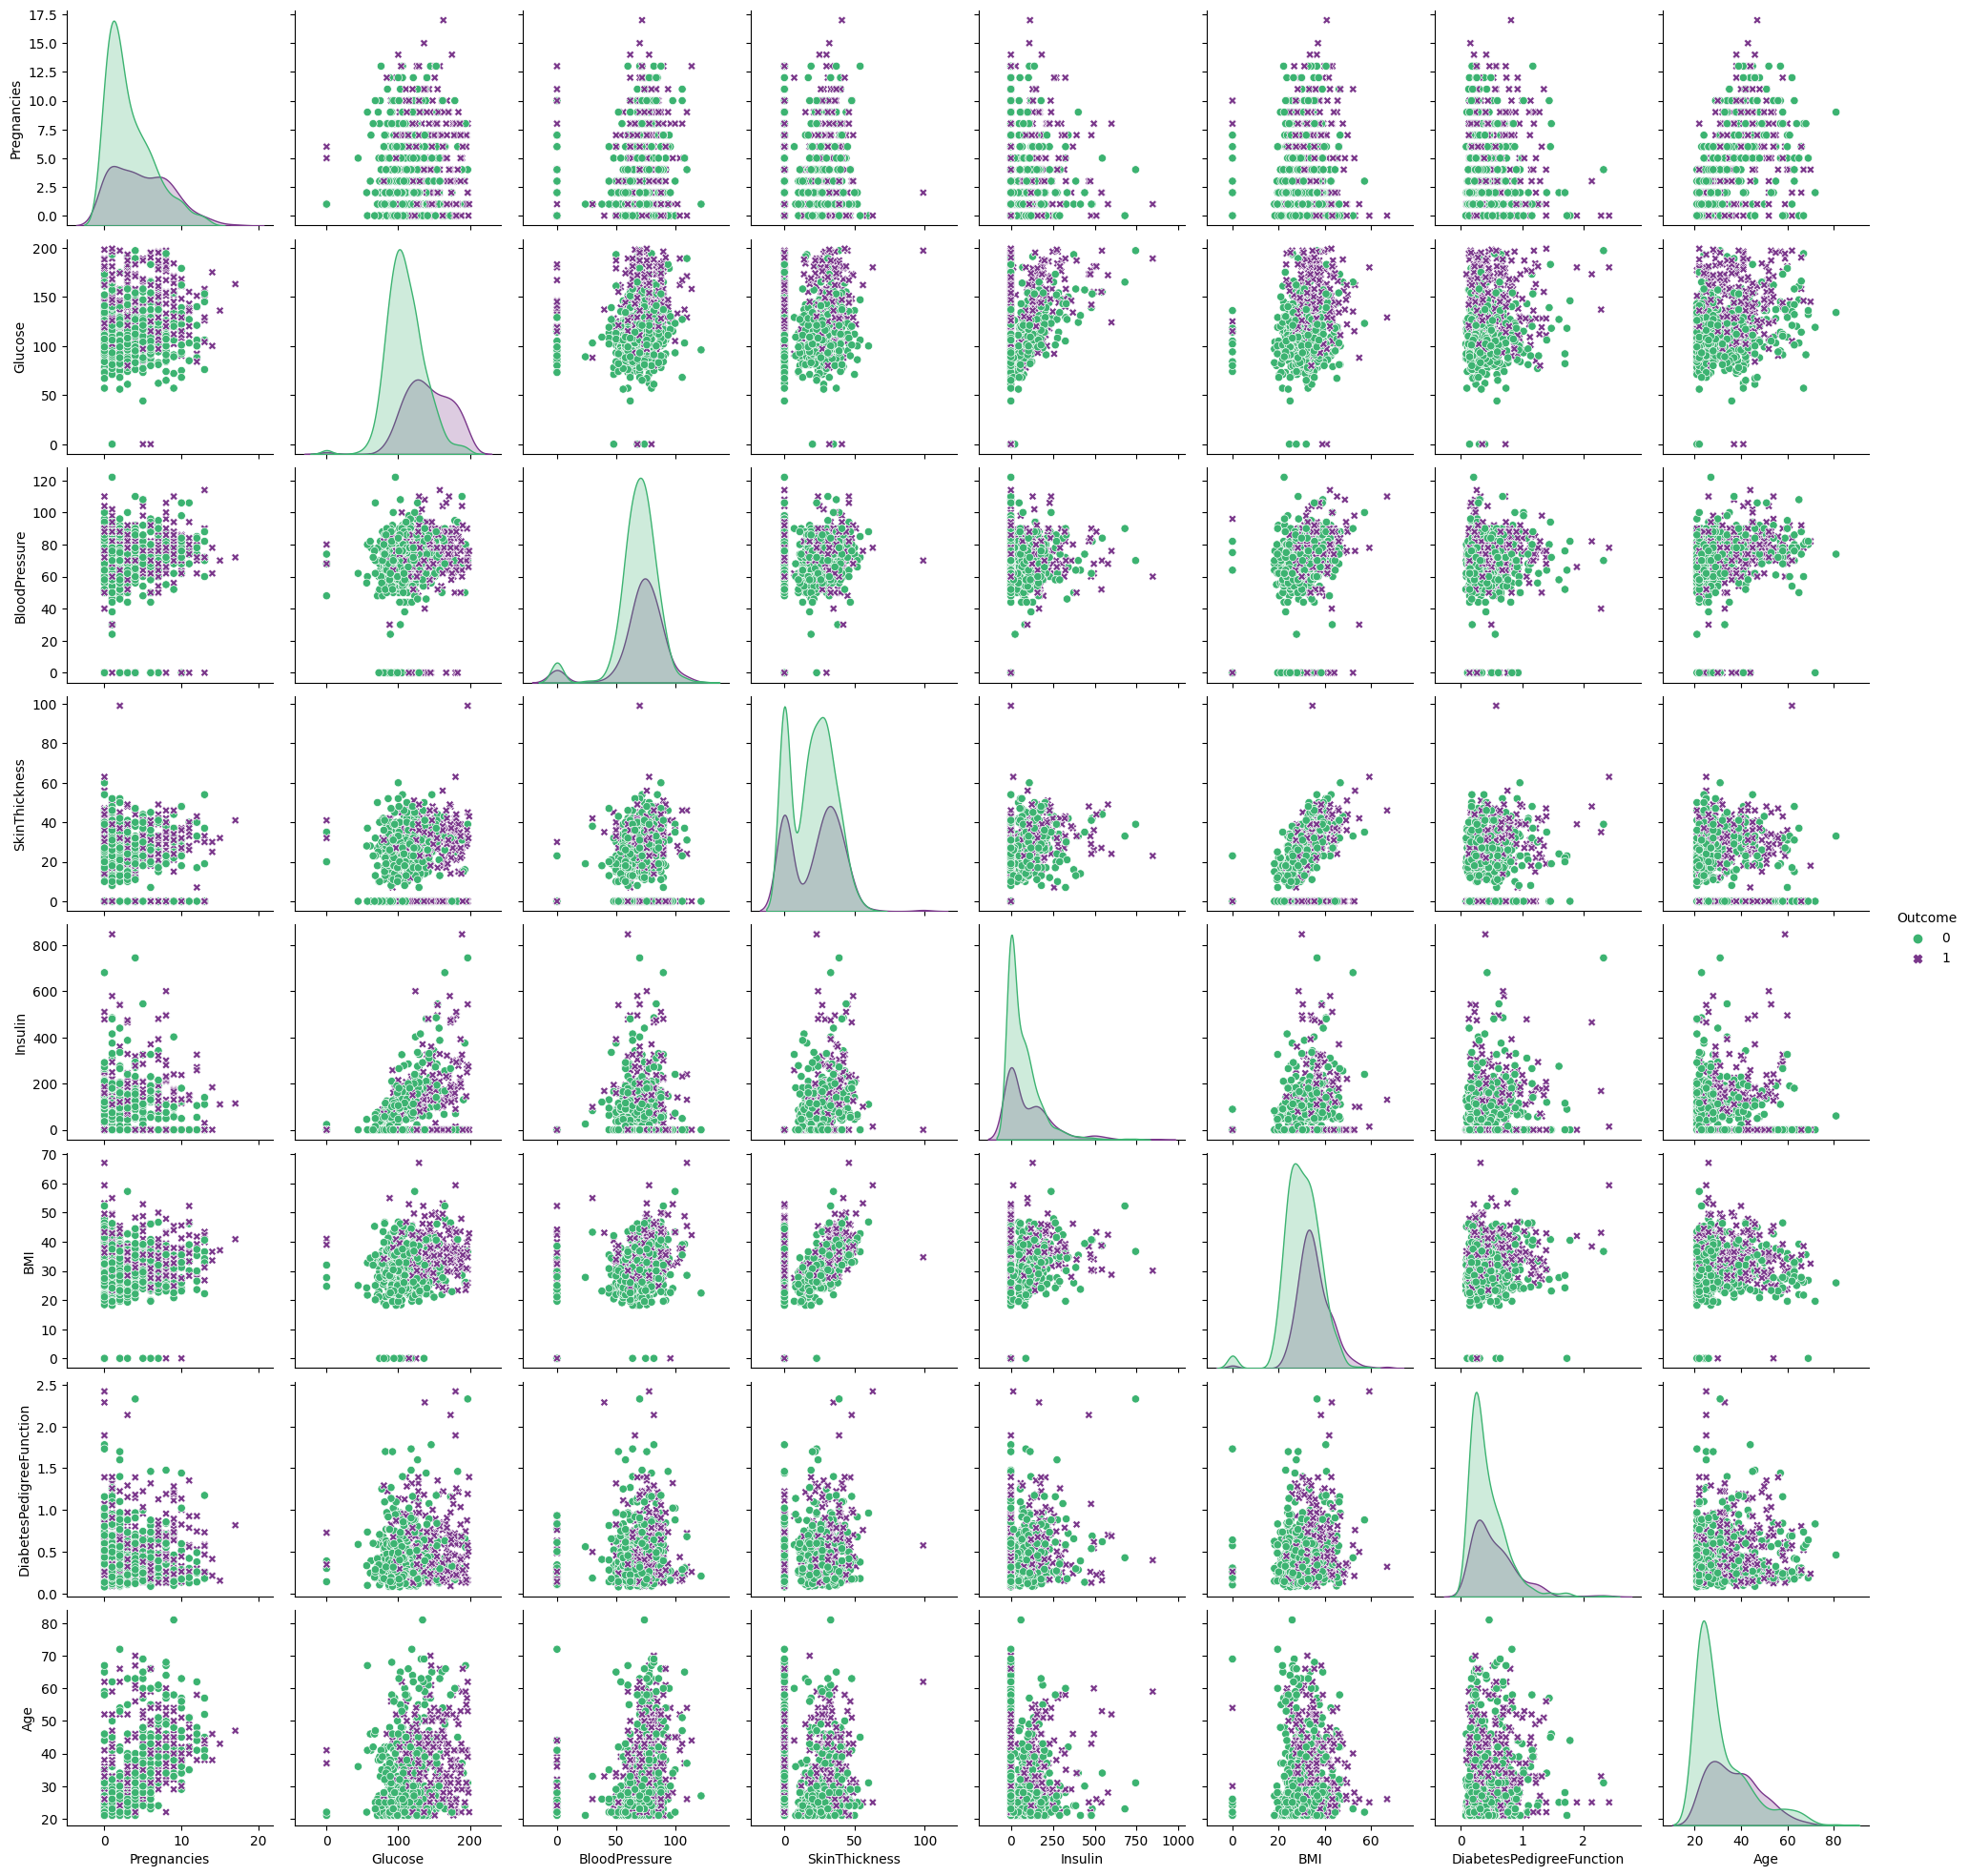

In [14]:
colores = {0: '#3CB371', 1: '#7A378B'}
sns.pairplot(diabetes, hue="Outcome", palette=colores, markers=['o', 'X'])
plt.show()

Nuevamente se observan varios puntos en 0 para el nivel de glucosa, presión arterial, grosor de la piel, nivel de insulina e índice de masa corporal.

Según la Organización Mundial de la Salud, WHO por sus siglas en inglés, los valores normales de glucosa en la sangre se encuentran entre 70mg/dL y 100mg/dL.

Fuente: https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2380

En la gráfica se observa que este comportamiento tambien ocurre para la presión arterial, grosor de la piel, nivel de insulina e índice de masa corporal. Supondremos que la data original contenía valores tipo NAN y fueron reemplazados por 0, ya que no tiene sentido que una persona no tenga glucosa o insulina en la sangre. 

Para esto, se imputarán los valores faltantes. Se hará de 2 formas, por media y por KNN.

No se tomará en cuenta la cantidad de embarazos para la imputación ya que sí es coherente que haya mujeres que no han estado embarazadas.

#### Imputación por media

In [15]:
diabetes_Med = diabetes.copy()
columnas = diabetes_Med.columns[1:-1]

for col in columnas:
    diabetes_Med[col] = diabetes_Med[col].replace(0, np.nan)
    media = diabetes_Med[col].mean()
    diabetes_Med[col] = diabetes_Med[col].fillna(media)


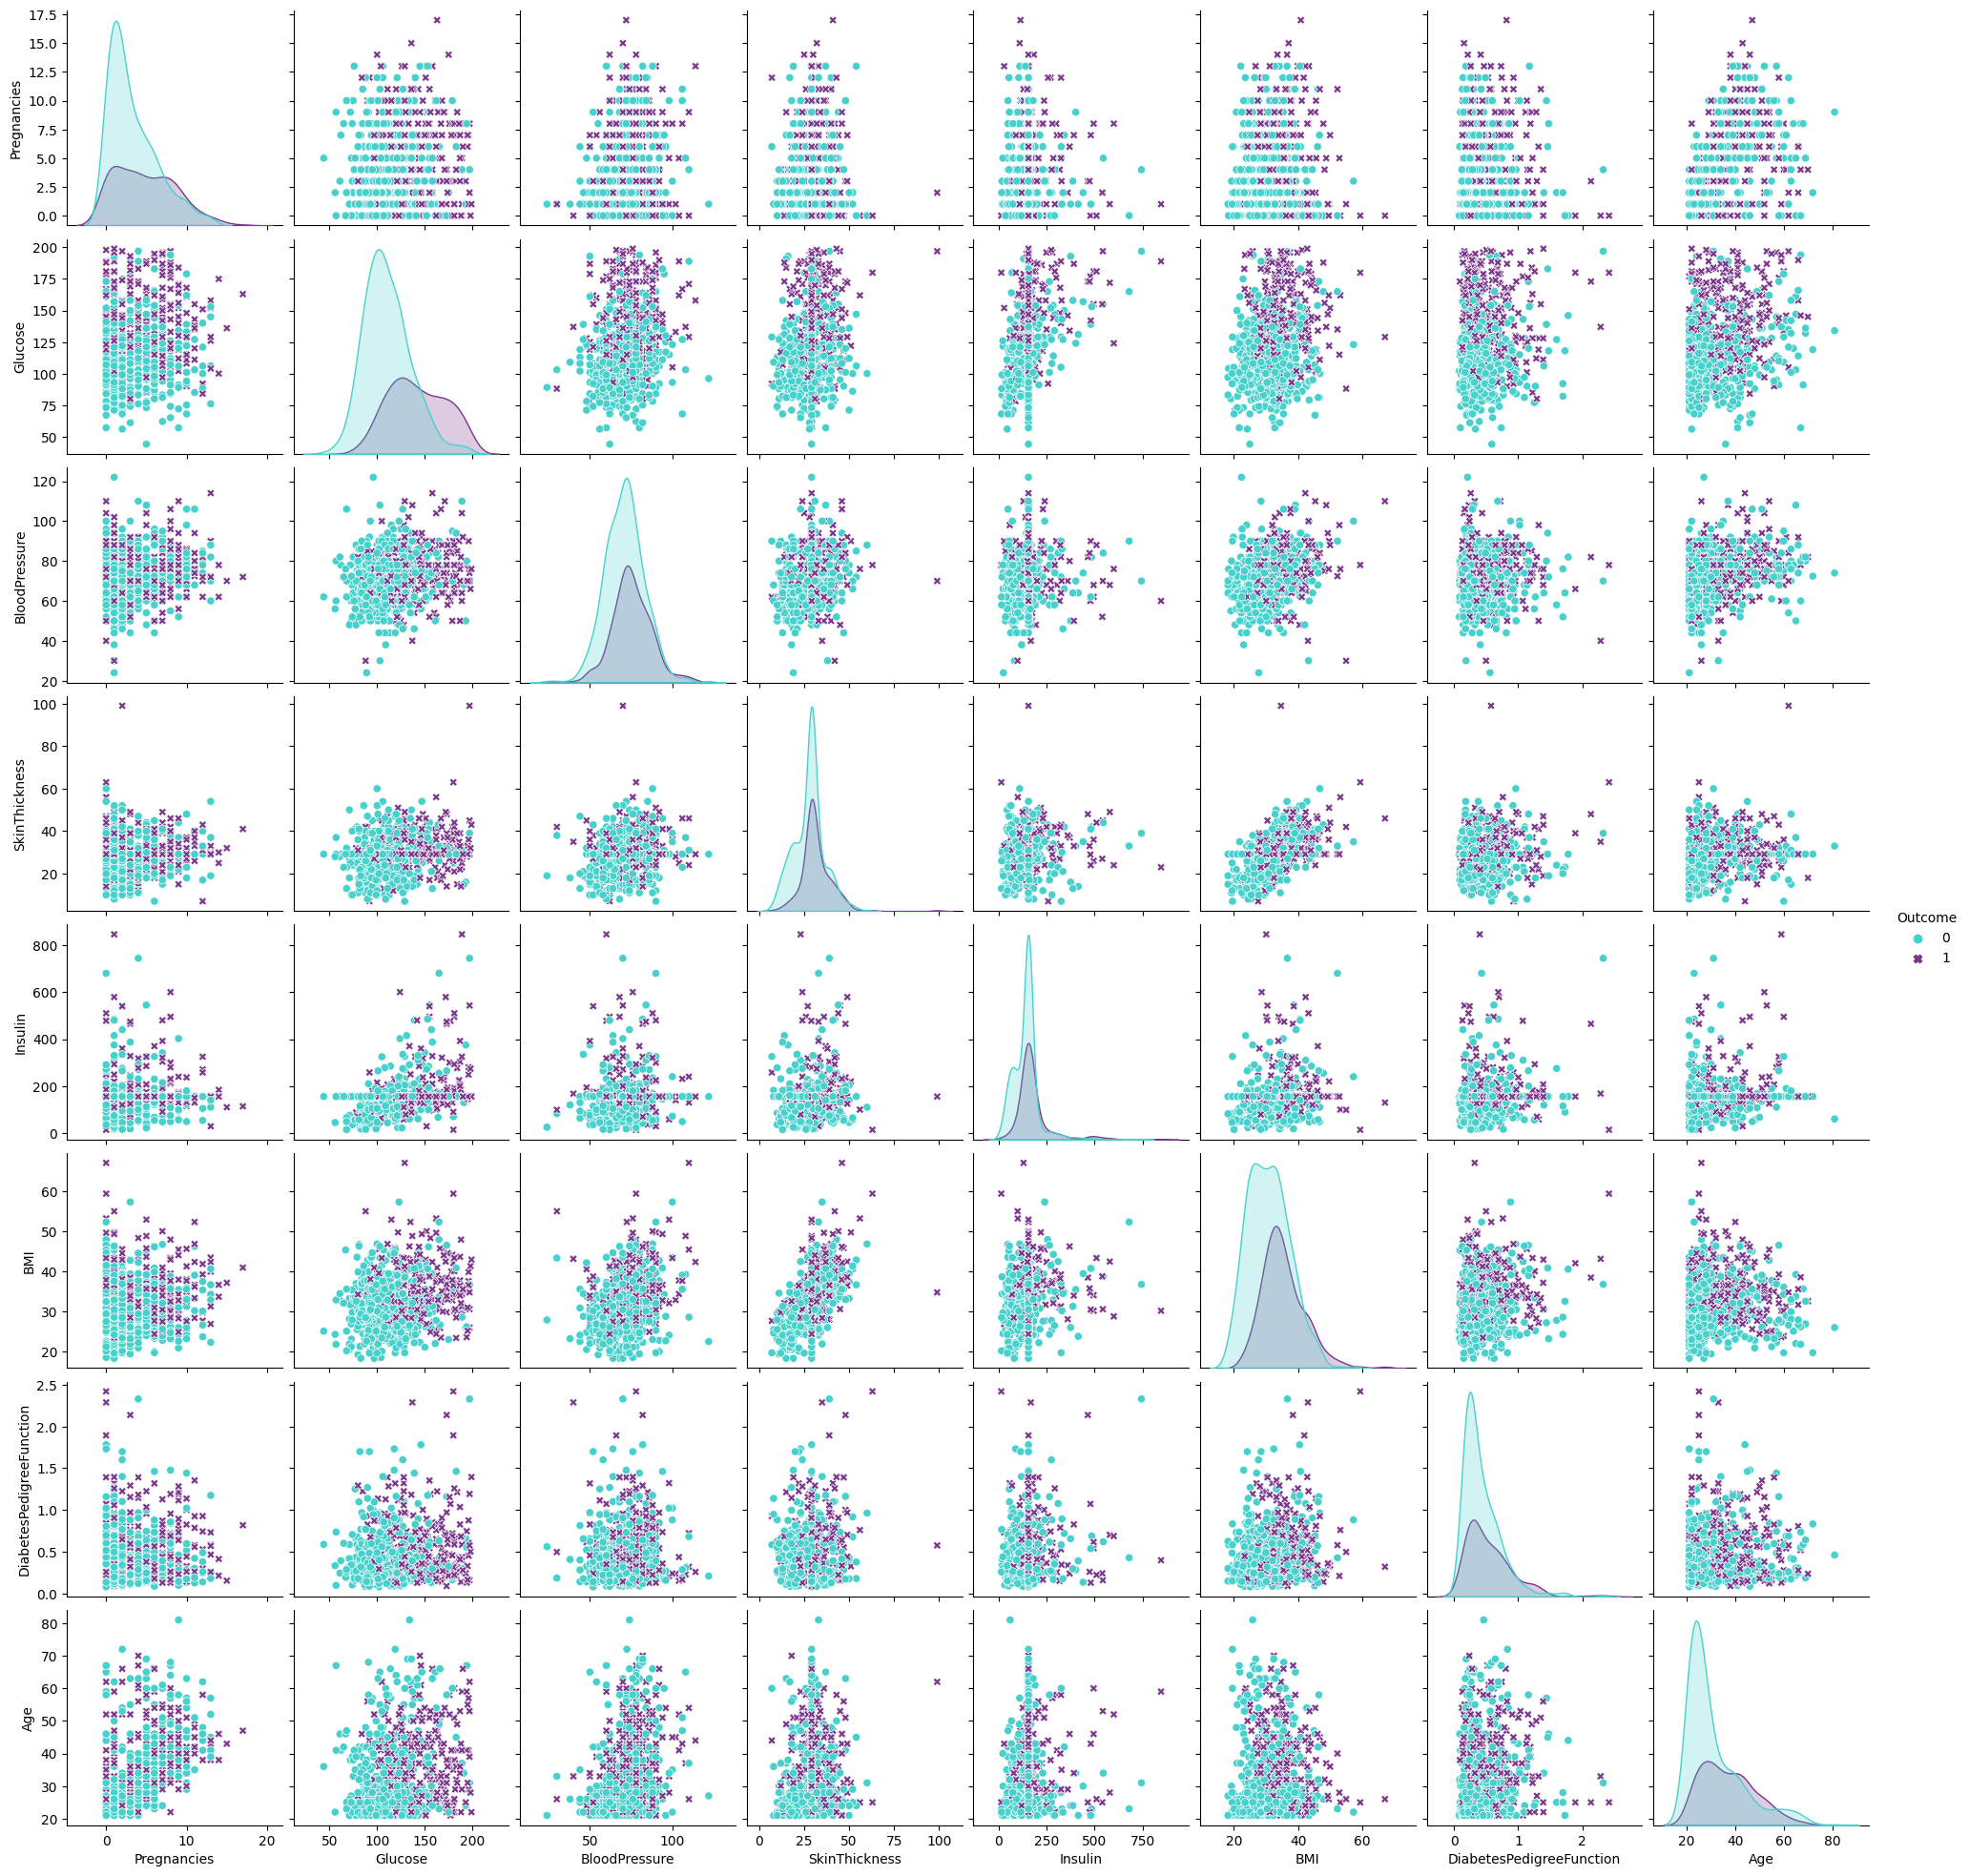

In [16]:
colores2 = {0: '#48D1CC', 1: '#7A378B'}
sns.pairplot(diabetes_Med, hue="Outcome", palette=colores2, markers=['o', 'X'])
plt.show()

#### Imputación por KNN

In [17]:
diabetes_KNN = diabetes.copy()
columnas2 = diabetes_KNN.columns[1:-1]

for col in columnas2:
    diabetes_KNN[col] = diabetes_KNN[col].replace(0, np.nan)

diabetes_KNN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [18]:
from scipy.sparse import data
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
for s in strategies:
 # create the modeling pipeline
 pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
 # evaluate the model
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(pipeline, diabetes_KNN.drop(["Outcome"], axis=1), diabetes_KNN["Outcome"],scoring='accuracy', cv=cv, n_jobs=-1)
 # store results
 results.append(scores)
 print('>%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))

>1 0.752 (0.047)
>3 0.750 (0.048)
>5 0.760 (0.049)
>7 0.749 (0.054)
>9 0.755 (0.052)
>15 0.759 (0.047)
>18 0.758 (0.055)
>21 0.754 (0.053)


In [19]:
imputer = KNNImputer(n_neighbors=15)
diabetes_KNN[columnas2] = imputer.fit_transform(diabetes_KNN[columnas2])

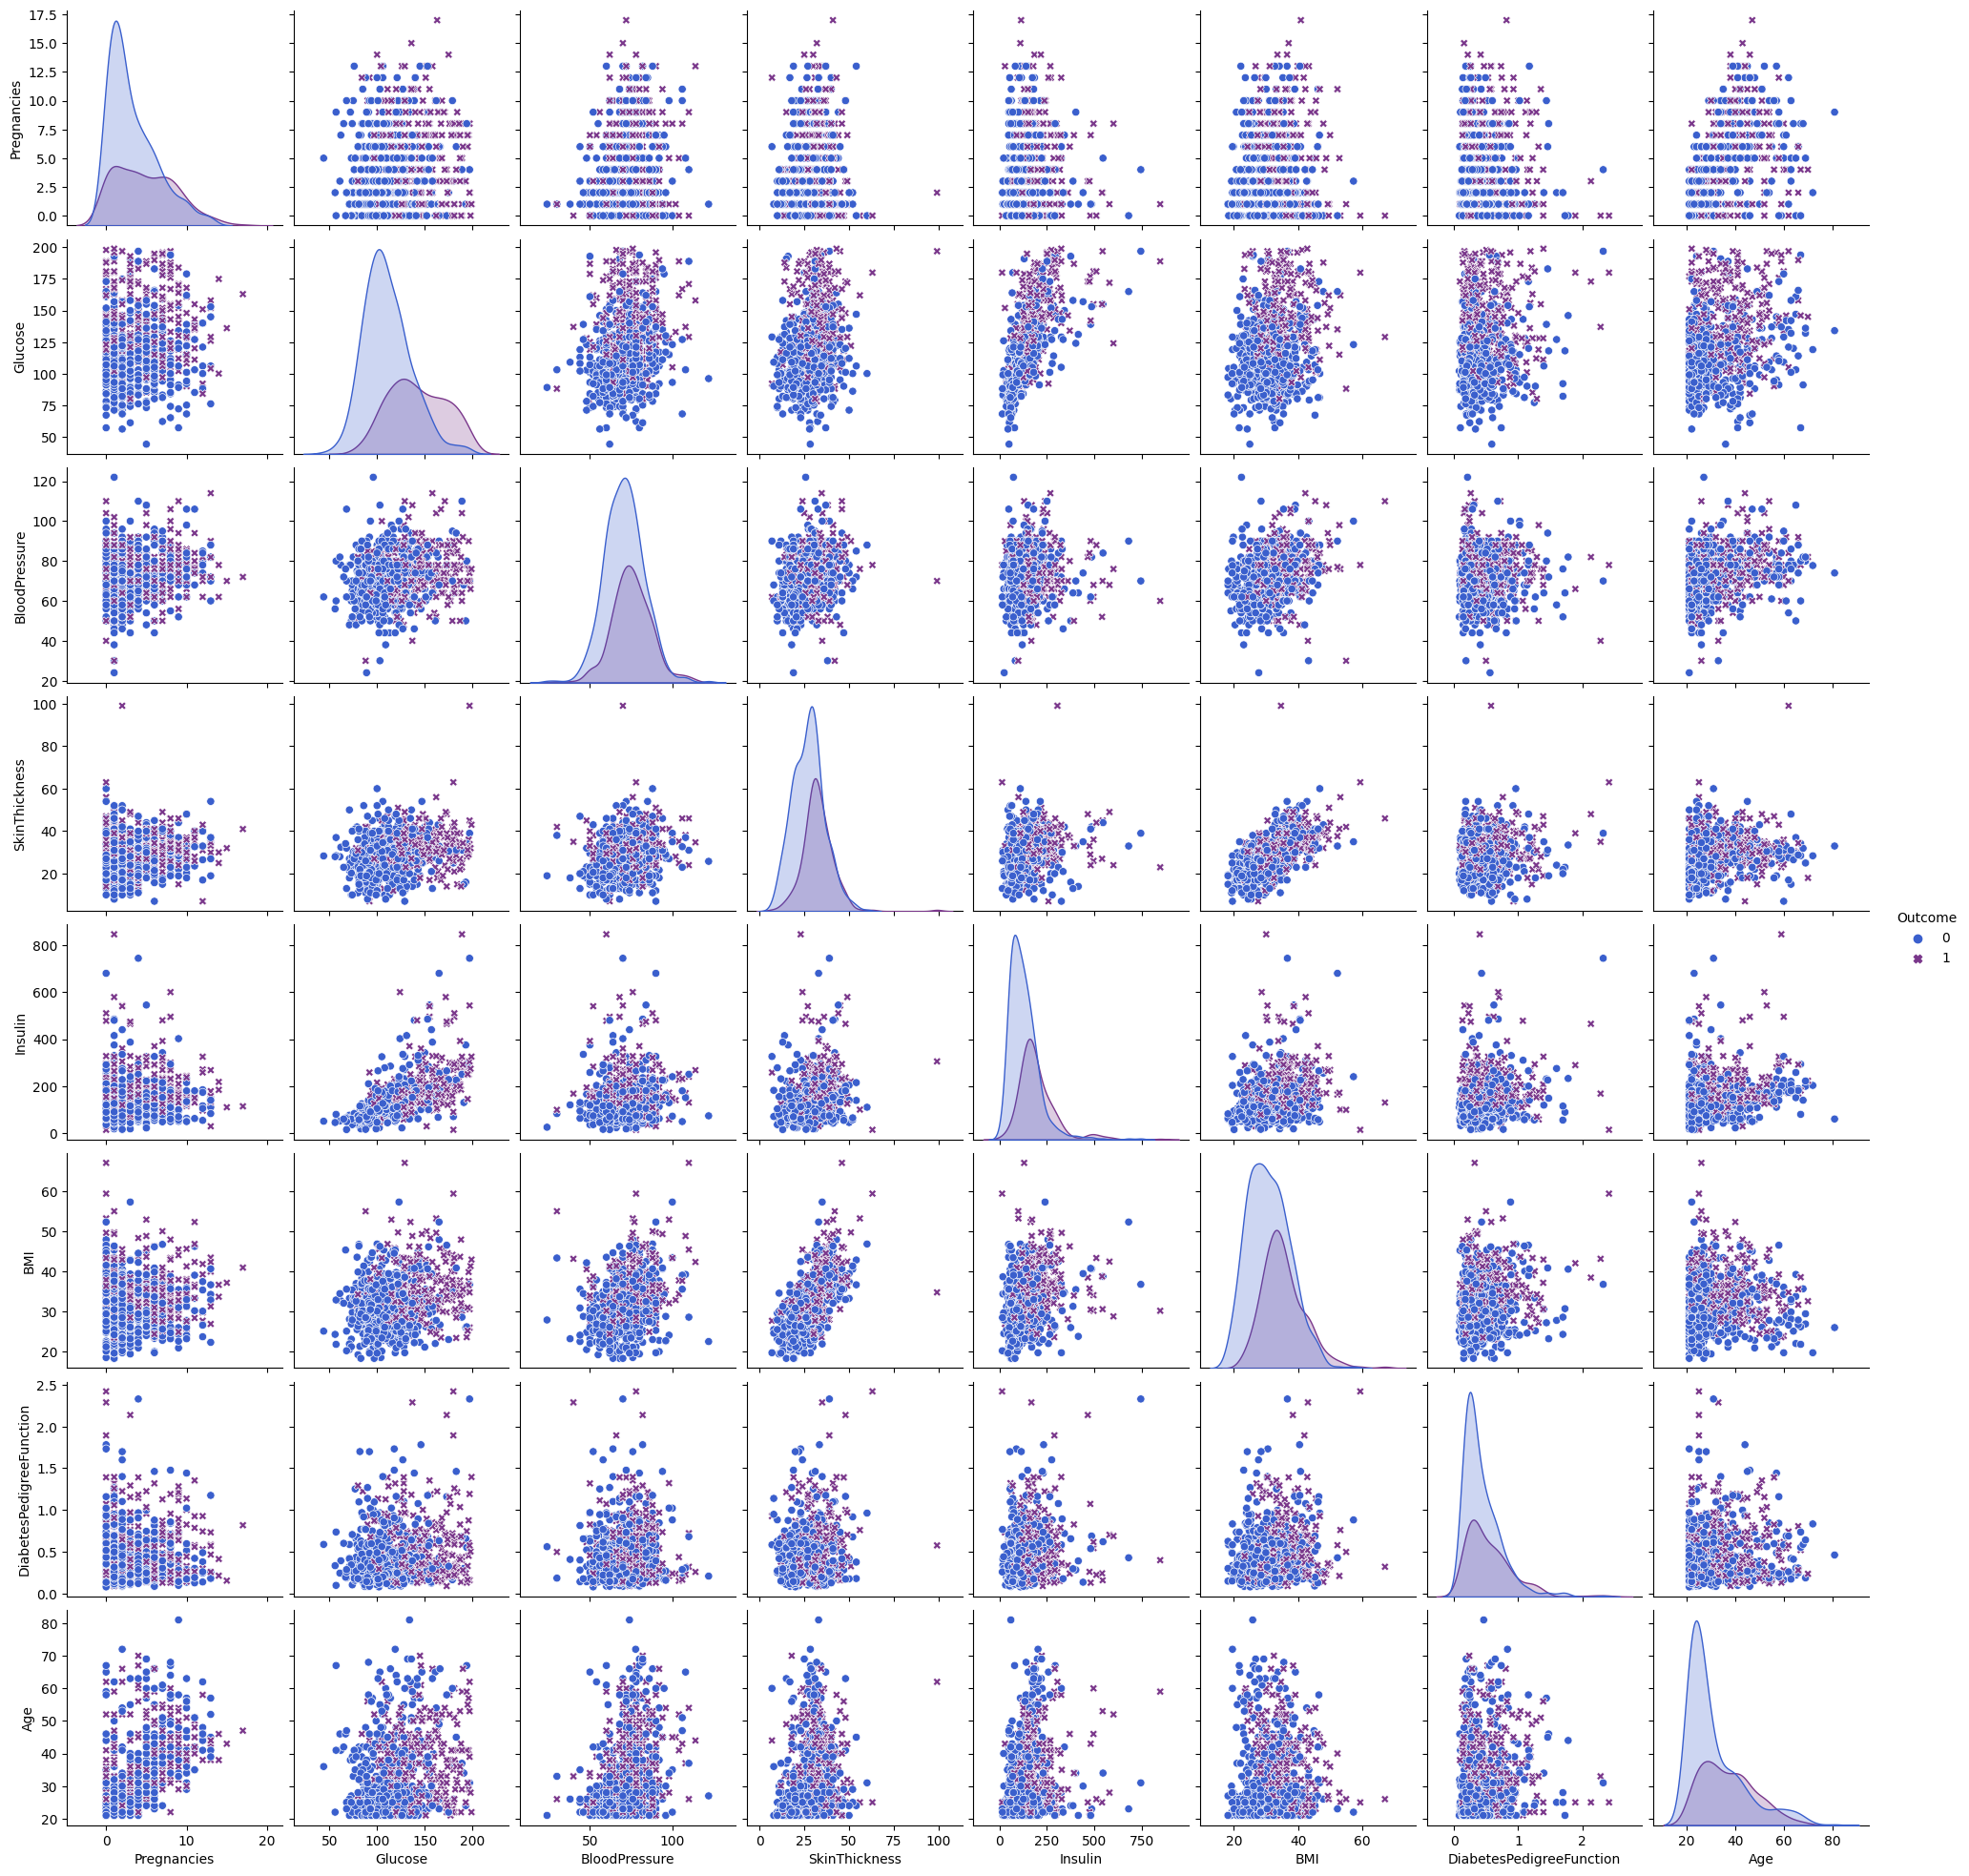

In [20]:
colores3 = {0: '#3A5FCD', 1: '#7A378B'}
sns.pairplot(diabetes_KNN, hue="Outcome", palette=colores3, markers=['o', 'X'])
plt.show()

In [21]:
diabetes_KNN.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.649045      72.331510      29.130208  152.334809   
std       3.369578   30.459769      12.153261       9.163552   95.001790   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      23.000000   89.283333   
50%       3.000000  117.000000      72.000000      29.166667  138.800000   
75%       6.000000  140.250000      80.000000      34.033333  185.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.439470                  0.471876   33.240885    0.348958  
std      6.882721                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.250000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

##### Boxplot Diabetes

c:\Users\and_w\anaconda3\envs\PruebaClase\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\and_w\anaconda3\envs\PruebaClase\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\and_w\anaconda3\envs\PruebaClase\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\and_w\anaconda3\envs\PruebaClase\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\and_w\anaconda3\envs\PruebaClase\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specif

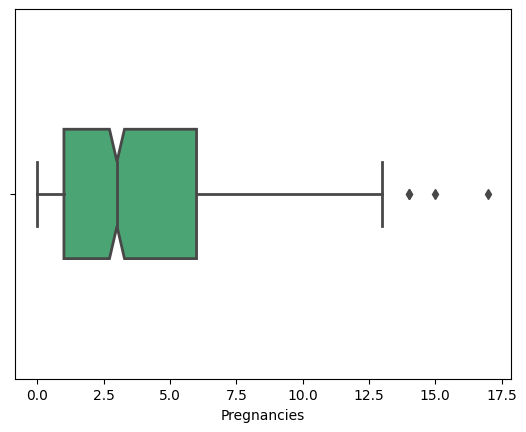

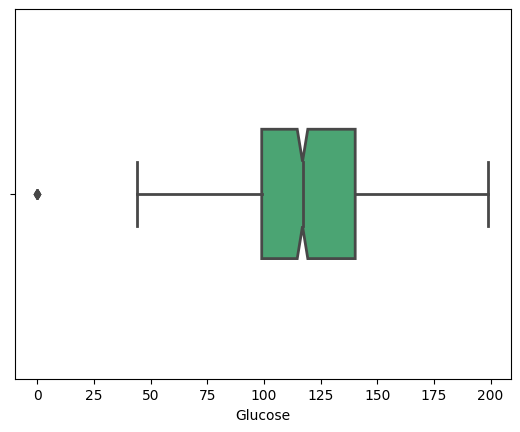

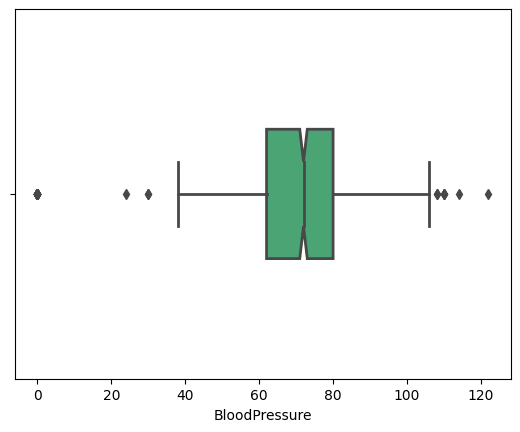

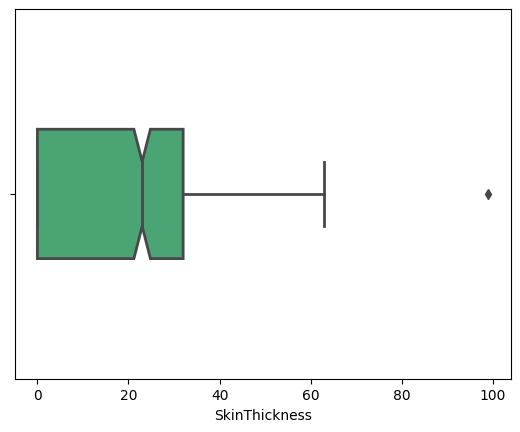

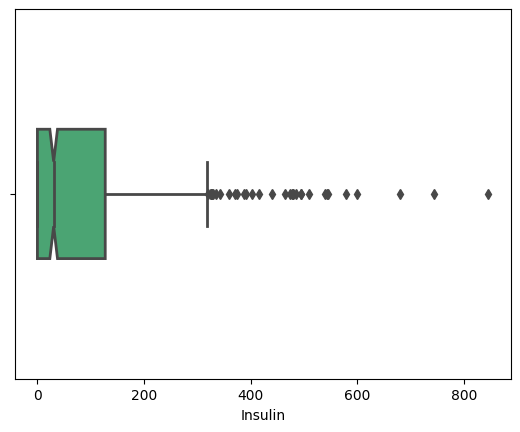

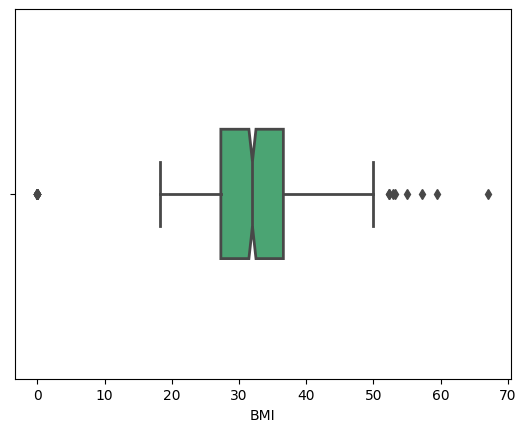

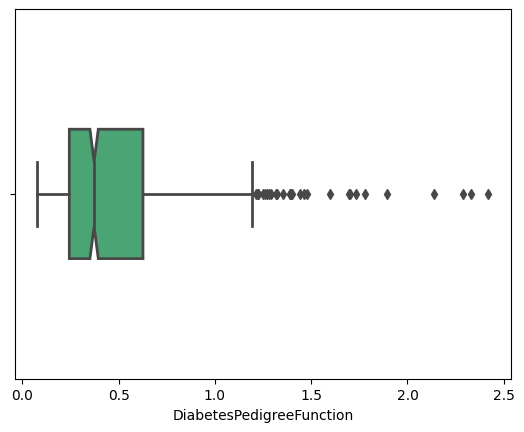

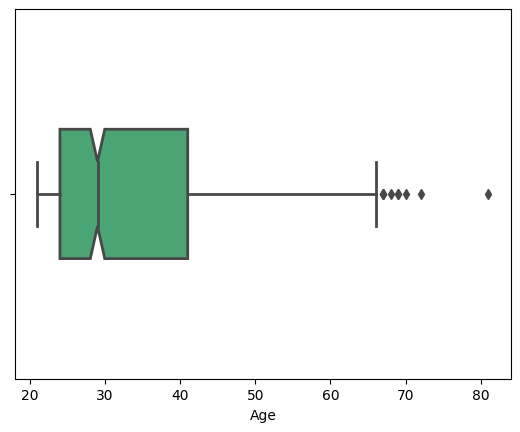

In [22]:
for col in diabetes.columns[0:-1]:
    plt.figure() 
    sns.boxplot(x=col, data=diabetes, orient="v", color="#3CB371", notch=True, linewidth=2, width=.35)

##### Boxplot Diabetes_Med

c:\Users\and_w\anaconda3\envs\PruebaClase\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\and_w\anaconda3\envs\PruebaClase\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\and_w\anaconda3\envs\PruebaClase\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\and_w\anaconda3\envs\PruebaClase\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\and_w\anaconda3\envs\PruebaClase\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specif

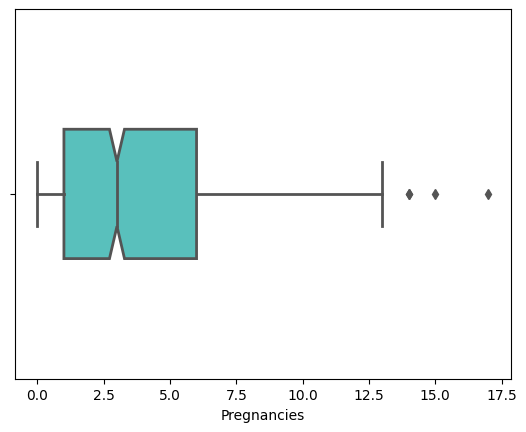

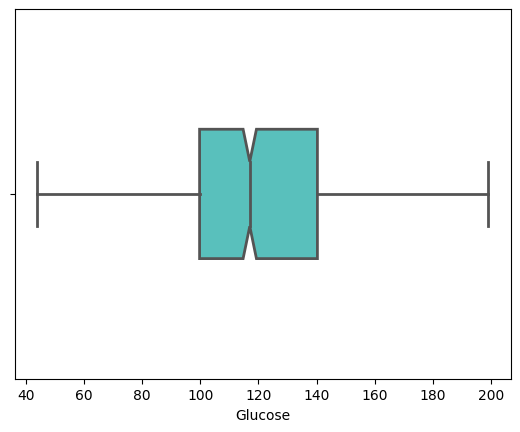

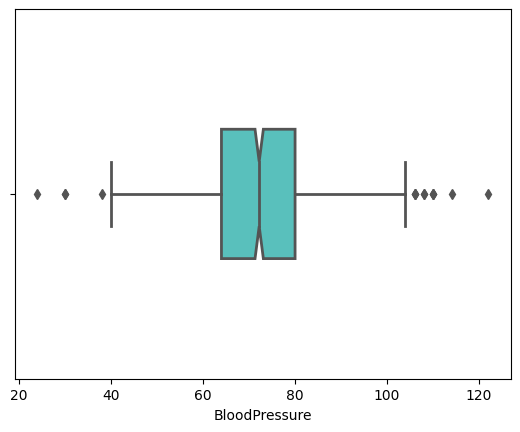

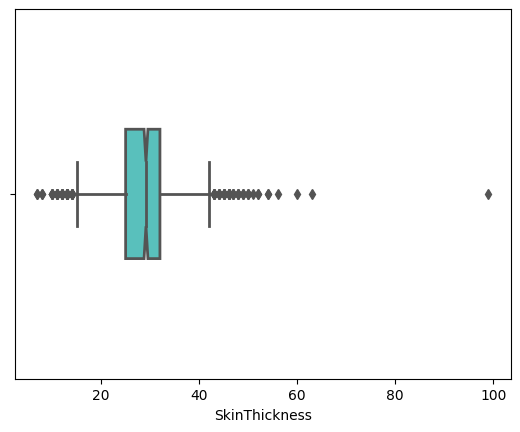

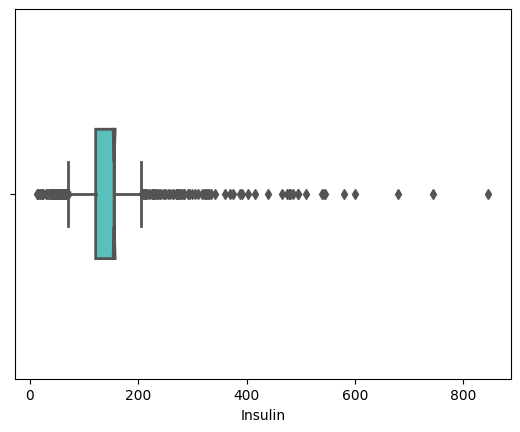

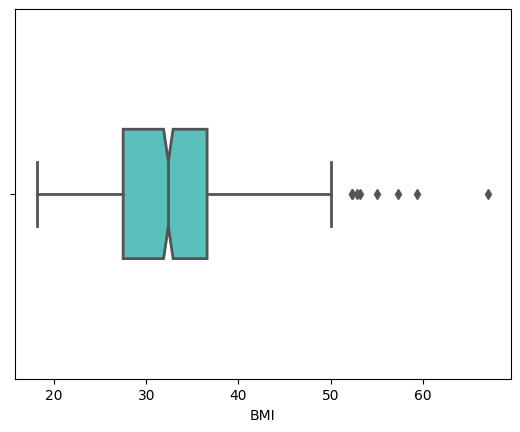

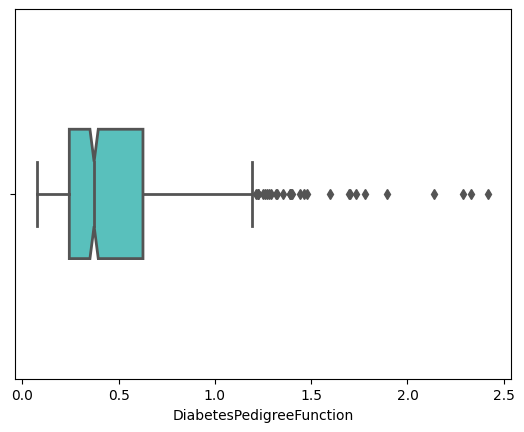

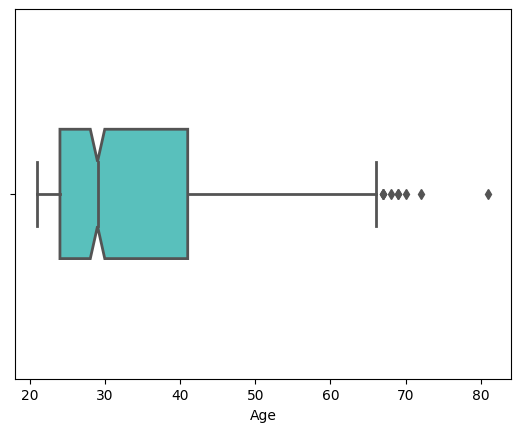

In [23]:
for col in diabetes_Med.columns[0:-1]:
    plt.figure() 
    sns.boxplot(x=col, data=diabetes_Med, orient="v", color="#48D1CC", notch=True, linewidth=2, width=.35)

##### Dataset Diabetes_KNN

c:\Users\and_w\anaconda3\envs\PruebaClase\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\and_w\anaconda3\envs\PruebaClase\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\and_w\anaconda3\envs\PruebaClase\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\and_w\anaconda3\envs\PruebaClase\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\and_w\anaconda3\envs\PruebaClase\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specif

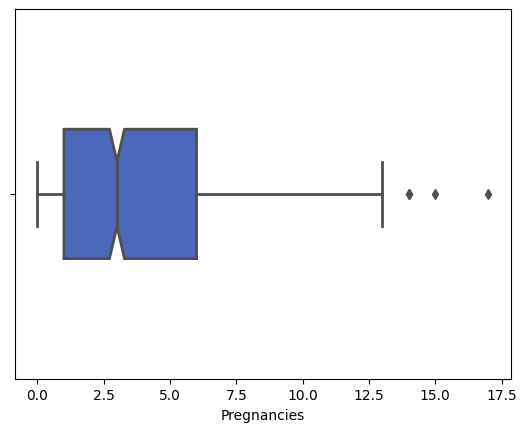

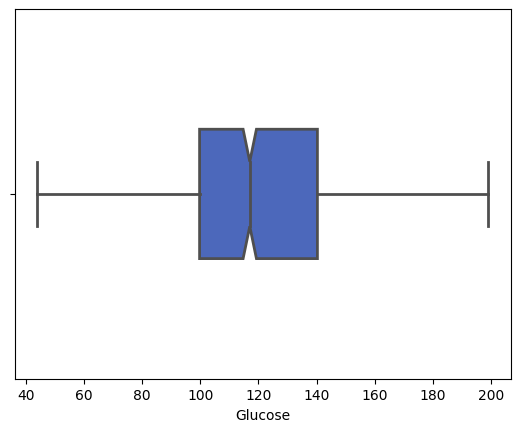

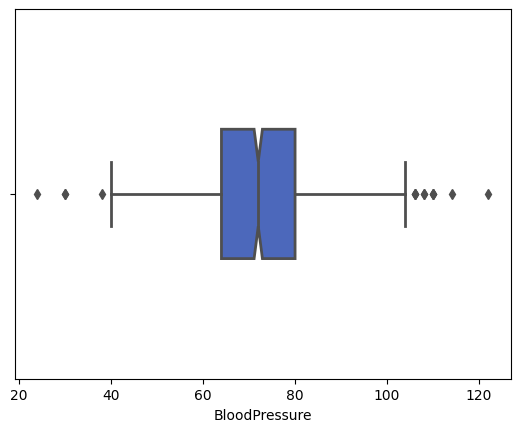

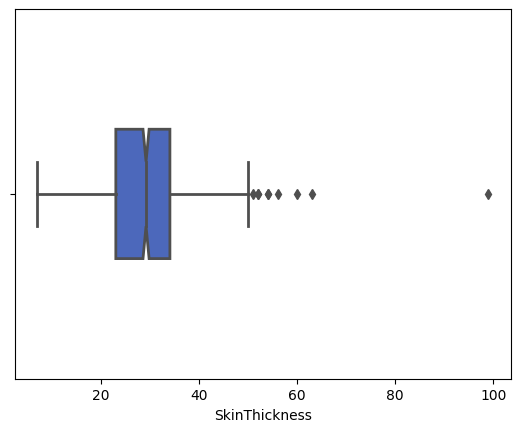

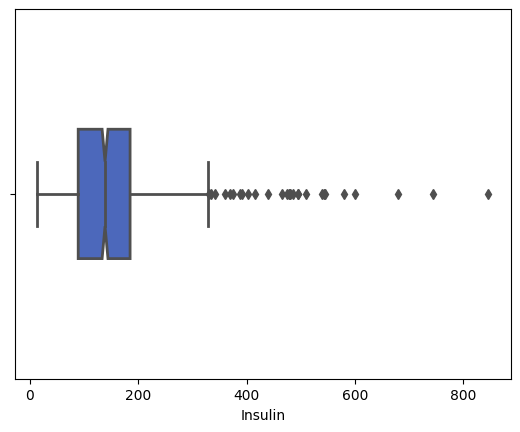

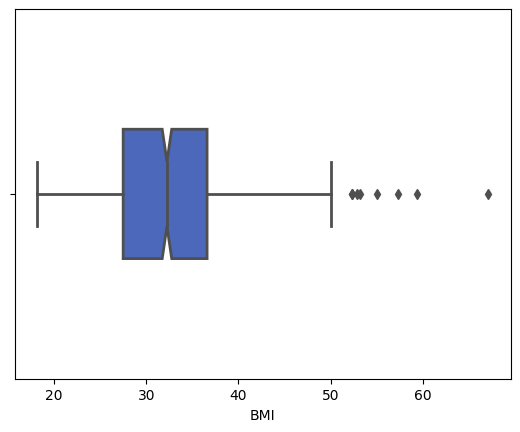

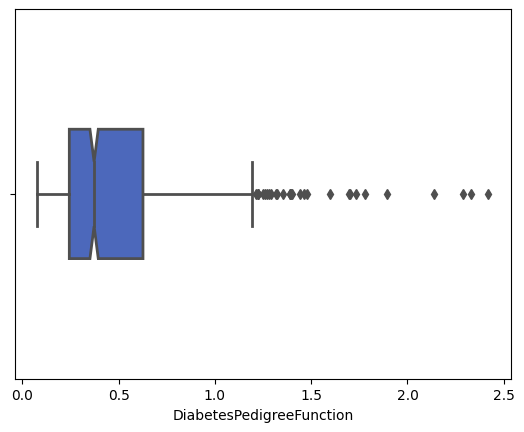

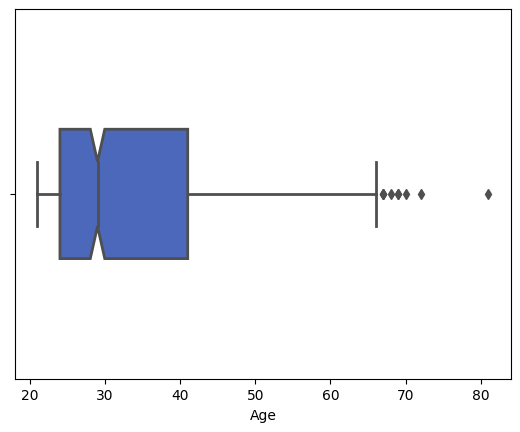

In [24]:
for col in diabetes_KNN.columns[0:-1]:
    plt.figure() 
    sns.boxplot(x=col, data=diabetes_KNN, orient="v", color="#3A5FCD", notch=True, linewidth=2, width=.35)

Se observa que aún existen outliers luego de la imputación. Se desplegarán los valores más grandes de cada columna con outliers en los datasets imputados. No se manipularán los datos del dataset original.

In [25]:
diabetes_Med.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [26]:
print(diabetes_Med["Glucose"].nlargest(10))

661    199.0
561    198.0
8      197.0
228    197.0
408    197.0
579    197.0
22     196.0
206    196.0
359    196.0
498    195.0
Name: Glucose, dtype: float64


In [27]:
print(diabetes_Med["BloodPressure"].nsmallest(10))

597    24.0
18     30.0
125    30.0
599    38.0
4      40.0
80     44.0
575    44.0
576    44.0
741    44.0
346    46.0
Name: BloodPressure, dtype: float64


In [28]:
diabetes_Med.drop(index=[597,18,125], inplace=True)

In [29]:
print(diabetes_Med["SkinThickness"].nlargest(10))

579    99.0
445    63.0
57     60.0
120    56.0
86     54.0
211    54.0
275    52.0
532    52.0
99     51.0
150    50.0
Name: SkinThickness, dtype: float64


In [30]:
diabetes_Med.drop(index=579, inplace=True)

In [31]:
print(diabetes_Med["Insulin"].nlargest(10))

13     846.0
228    744.0
247    680.0
584    600.0
409    579.0
286    545.0
8      543.0
655    540.0
753    510.0
111    495.0
Name: Insulin, dtype: float64


In [32]:
diabetes_Med.drop(index=[13,228,247], inplace=True)

In [33]:
print(diabetes_Med["BMI"].nlargest(15))

177    67.1
445    59.4
673    57.3
120    53.2
303    52.9
193    52.3
155    50.0
99     49.7
681    49.6
746    49.3
84     48.8
378    48.3
154    47.9
335    47.9
57     46.8
Name: BMI, dtype: float64


In [34]:
diabetes_Med.drop(index=177, inplace=True)

In [35]:
diabetes_KNN.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [36]:
print(diabetes_KNN["Glucose"].nlargest(10))

661    199.0
561    198.0
8      197.0
228    197.0
408    197.0
579    197.0
22     196.0
206    196.0
359    196.0
498    195.0
Name: Glucose, dtype: float64


In [37]:
print(diabetes_KNN["BloodPressure"].nsmallest(10))

597    24.0
18     30.0
125    30.0
599    38.0
4      40.0
80     44.0
575    44.0
576    44.0
741    44.0
346    46.0
Name: BloodPressure, dtype: float64


In [38]:
diabetes_KNN.drop(index=[597,18,125], inplace=True)

In [39]:
print(diabetes_KNN["SkinThickness"].nlargest(10))

579    99.0
445    63.0
57     60.0
120    56.0
86     54.0
211    54.0
275    52.0
532    52.0
99     51.0
150    50.0
Name: SkinThickness, dtype: float64


In [40]:
diabetes_KNN.drop(index=579, inplace=True)

In [41]:
print(diabetes_KNN["Insulin"].nlargest(10))

13     846.0
228    744.0
247    680.0
584    600.0
409    579.0
286    545.0
8      543.0
655    540.0
753    510.0
111    495.0
Name: Insulin, dtype: float64


In [42]:
diabetes_KNN.drop(index=[13,228,247], inplace=True)

In [43]:
print(diabetes_KNN["BMI"].nlargest(15))

177    67.1
445    59.4
673    57.3
120    53.2
303    52.9
193    52.3
155    50.0
99     49.7
681    49.6
746    49.3
84     48.8
378    48.3
154    47.9
335    47.9
57     46.8
Name: BMI, dtype: float64


In [44]:
diabetes_KNN.drop(index=177, inplace=True)

Se comparan las densidades resultantes luego de la imputación y eliminación de outliers

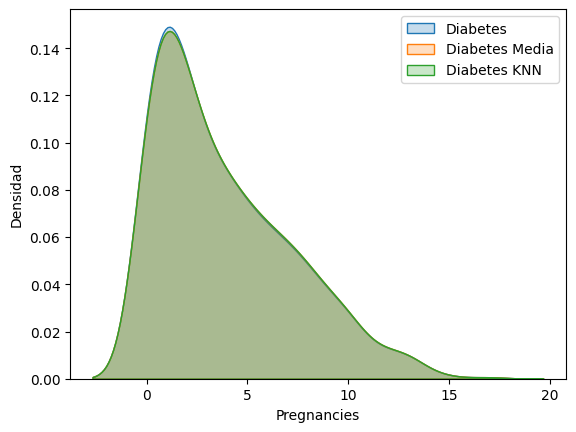

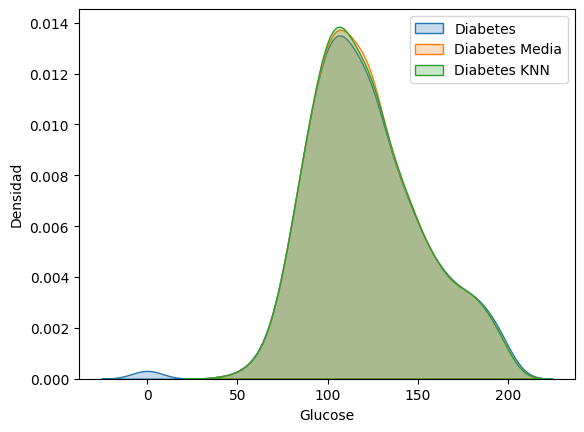

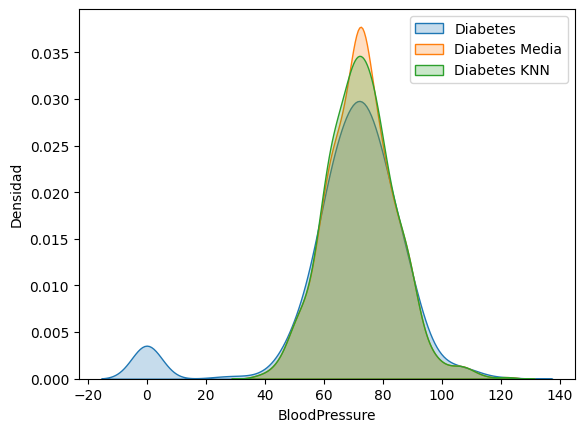

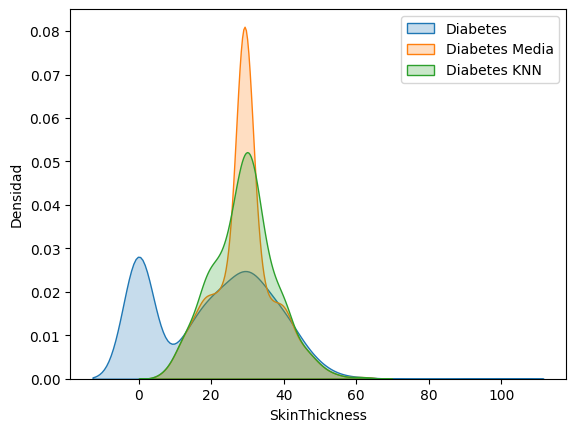

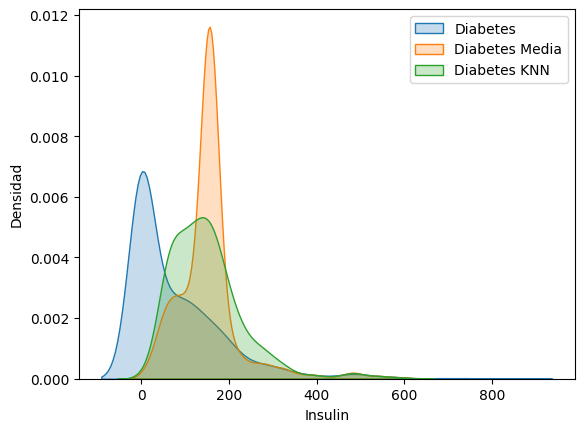

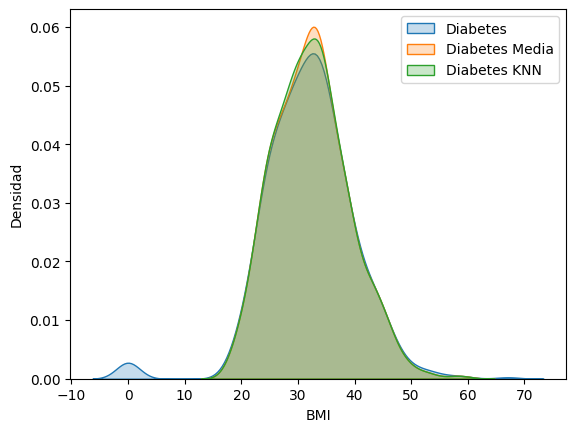

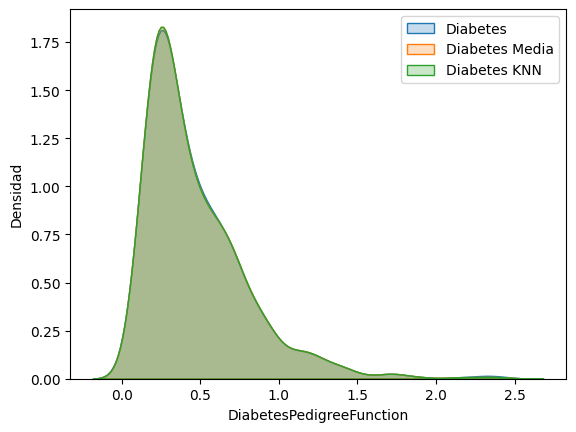

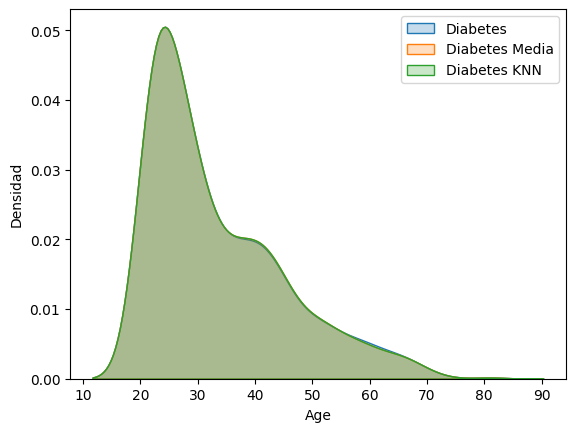

In [45]:
for col in diabetes.columns[0:-1]:
    fig, ax = plt.subplots()
    sns.kdeplot(diabetes[col], ax=ax, label='Diabetes', fill=True)
    sns.kdeplot(diabetes_Med[col], ax=ax, label='Diabetes Media', fill=True)
    sns.kdeplot(diabetes_KNN[col], ax=ax, label='Diabetes KNN', fill=True)
    ax.set_ylabel('Densidad')
    ax.legend()
    plt.show()

#### Datasets de entrenamiento y prueba

In [46]:
# diabetes
x = diabetes.drop(["Outcome"], axis = 1)
y = diabetes["Outcome"]

# diabetes media imputada
x_med = diabetes_Med.drop(["Outcome"], axis = 1)
y_med = diabetes_Med["Outcome"]

# diabetes KNN imputado
x_KNN = diabetes_KNN.drop(["Outcome"], axis = 1)
y_KNN = diabetes_KNN["Outcome"]

In [47]:
seed = 42

# diabetes
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = seed)

# diabetes media imputada
xmed_train, xmed_test, ymed_train, ymed_test = train_test_split(x_med, y_med, test_size = 0.3, random_state = seed)

# diabetes KNN imputado
xknn_train, xknn_test, yknn_train, yknn_test = train_test_split(x_KNN, y_KNN, test_size = 0.3, random_state = seed)

#### Estandarización de datos

Se utilizarán dos métodos para la estandarización. La estándar y la robusta. La estandarización simple transforma los datos según la media y la desviación estándar, mientras que la robusta utiliza la mediana y el rango intercuantílico.

In [48]:
estandar = StandardScaler()
robusta = RobustScaler()

#Estándar
sx_train = estandar.fit_transform(x_train)
sx_test = estandar.transform(x_test)

sxmed_train = estandar.fit_transform(xmed_train)
sxmed_test = estandar.transform(xmed_test)

sxknn_train = estandar.fit_transform(xknn_train)
sxknn_test = estandar.transform(xknn_test)

#Robusta
rsx_train = robusta.fit_transform(x_train)
rsx_test = robusta.transform(x_test)

rsxmed_train = robusta.fit_transform(xmed_train)
rsxmed_test = robusta.transform(xmed_test)

rsxknn_train = robusta.fit_transform(xknn_train)
rsxknn_test = robusta.transform(xknn_test)

#### Cross Validation para encontrar el mejor K

Para el dataset original con estandarización simple

In [49]:
rango = [i for i in range (1,11)]
acc = []

for k in rango:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, sx_train, y_train, cv=5)
    acc.append(np.mean(score))

Text(0, 0.5, 'Accuracy')

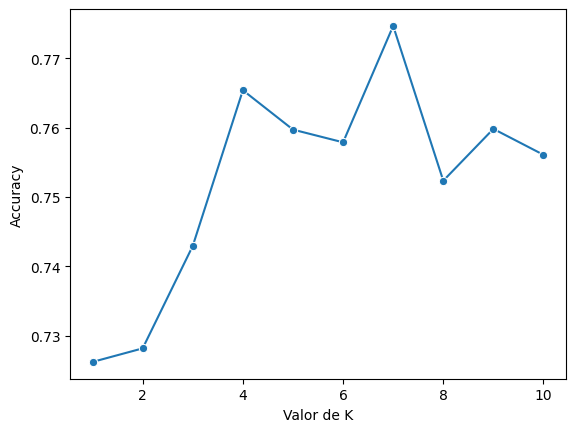

In [50]:
sns.lineplot(x = rango, y = acc, marker = 'o')
plt.xlabel("Valor de K")
plt.ylabel("Accuracy")

Para el dataset imputado con la media y estandarización simple

In [77]:
rango2 = [i for i in range (1,31)]
acc2 = []

for k in rango2:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, sxmed_train, ymed_train, cv=5)
    acc2.append(np.mean(score))

Text(0, 0.5, 'Accuracy')

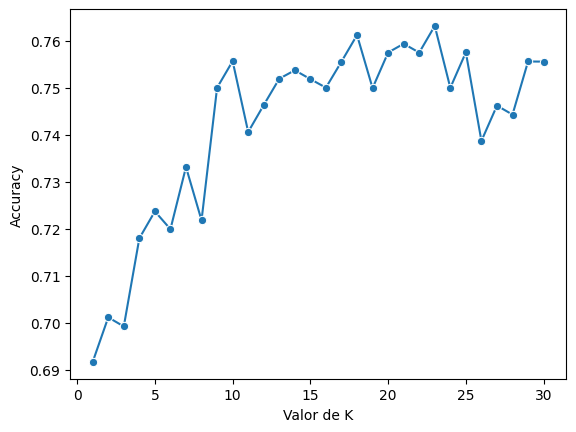

In [78]:
sns.lineplot(x = rango2, y = acc2, marker = 'o')
plt.xlabel("Valor de K")
plt.ylabel("Accuracy")

Para el dataset imputado con KNN y con estandarización simple

In [53]:
rango3 = [i for i in range (1,31)]
acc3 = []

for k in rango3:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, sxknn_train, yknn_train, cv=5)
    acc3.append(np.mean(score))

Text(0, 0.5, 'Accuracy')

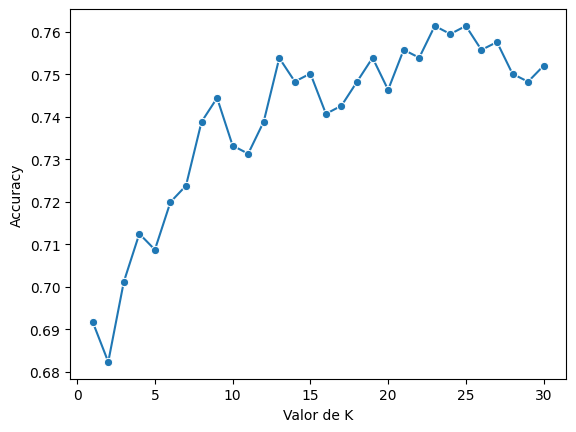

In [54]:
sns.lineplot(x = rango3, y = acc3, marker = 'o')
plt.xlabel("Valor de K")
plt.ylabel("Accuracy")

Para el dataset original con estandarización robusta

In [55]:
rango4 = [i for i in range (1,21)]
acc4 = []

for k in rango4:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, rsx_train, y_train, cv=5)
    acc4.append(np.mean(score))

Text(0, 0.5, 'Accuracy')

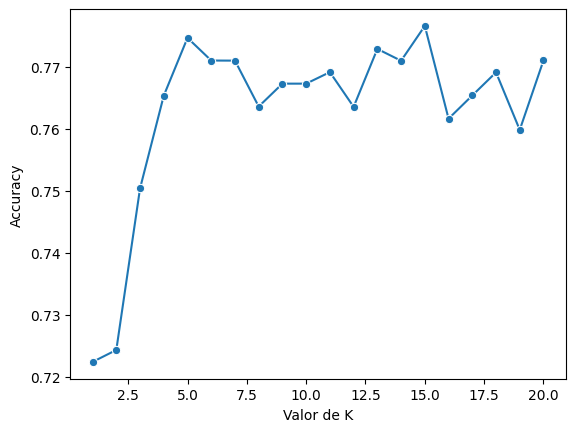

In [56]:
sns.lineplot(x = rango4, y = acc4, marker = 'o')
plt.xlabel("Valor de K")
plt.ylabel("Accuracy")

Para el dataset imputado con la media y estandarización robusta

In [57]:
rango5 = [i for i in range (1,31)]
acc5 = []

for k in rango5:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, rsxmed_train, ymed_train, cv=5)
    acc5.append(np.mean(score))

Text(0, 0.5, 'Accuracy')

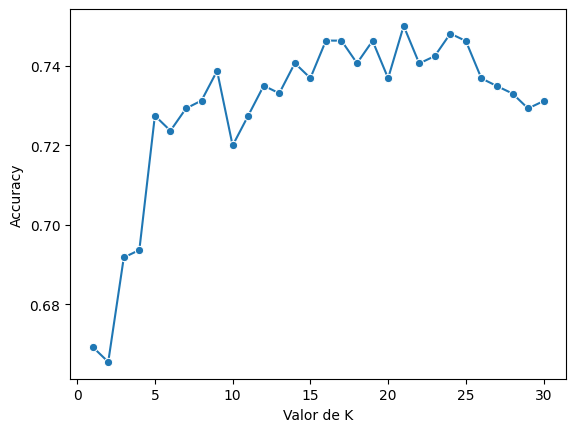

In [58]:
sns.lineplot(x = rango5, y = acc5, marker = 'o')
plt.xlabel("Valor de K")
plt.ylabel("Accuracy")

Para el dataset imputado con KNN y con estandarización robusta

In [59]:
rango6 = [i for i in range (1,31)]
acc6 = []

for k in rango6:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, rsxknn_train, yknn_train, cv=5)
    acc6.append(np.mean(score))

Text(0, 0.5, 'Accuracy')

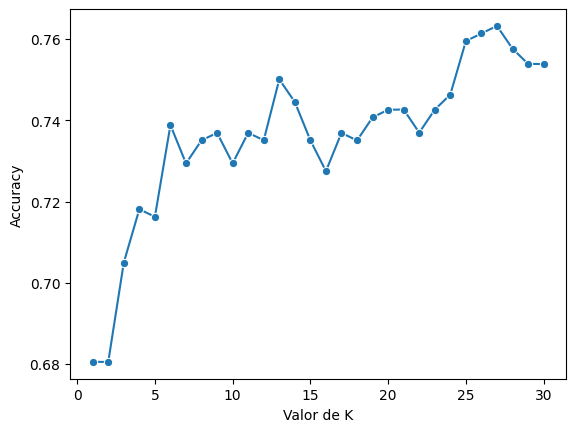

In [60]:
sns.lineplot(x = rango6, y = acc6, marker = 'o')
plt.xlabel("Valor de K")
plt.ylabel("Accuracy")

In [61]:
mejor_k = rango[np.argmax(acc)]
mejor_kmed = rango2[np.argmax(acc2)]
mejor_kknn = rango3[np.argmax(acc3)]
mejor_rk = rango4[np.argmax(acc4)]
mejor_rkmed = rango5[np.argmax(acc5)]
mejor_rkknn = rango6[np.argmax(acc6)]

#### Entrenamiento de los modelos

In [62]:
# Estandarización simple
knn = KNeighborsClassifier(n_neighbors=mejor_k)
knn.fit(sx_train, y_train)

knn_med = KNeighborsClassifier(n_neighbors=mejor_kmed)
knn_med.fit(sxmed_train, ymed_train)

knn_knn = KNeighborsClassifier(n_neighbors=mejor_kknn)
knn_knn.fit(sxknn_train, yknn_train)

# Estandarización robusta
rknn = KNeighborsClassifier(n_neighbors=mejor_rk)
rknn.fit(rsx_train, y_train)

rknn_med = KNeighborsClassifier(n_neighbors=mejor_rkmed)
rknn_med.fit(rsxmed_train, ymed_train)

rknn_knn = KNeighborsClassifier(n_neighbors=mejor_rkknn)
rknn_knn.fit(rsxknn_train, yknn_train)

KNeighborsClassifier(n_neighbors=27)

#### Predicción de los modelos

In [63]:
y_pred = knn.predict(sx_test)
ymed_pred = knn_med.predict(sxmed_test)
yknn_pred = knn_knn.predict(sxknn_test)

In [79]:
yr_pred = rknn.predict(rsx_test)
yrmed_pred = rknn_med.predict(rsxmed_test)
yrknn_pred = rknn_knn.predict(rsxknn_test)

#### Evaluación de los modelos

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78       151
           1       0.57      0.50      0.53        80

    accuracy                           0.70       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



In [65]:
print(classification_report(ymed_test, ymed_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       156
           1       0.60      0.61      0.61        72

    accuracy                           0.75       228
   macro avg       0.71      0.71      0.71       228
weighted avg       0.75      0.75      0.75       228



In [66]:
print(classification_report(yknn_test, yknn_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       156
           1       0.61      0.54      0.57        72

    accuracy                           0.75       228
   macro avg       0.70      0.69      0.70       228
weighted avg       0.74      0.75      0.74       228



In [67]:
print(classification_report(y_test, yr_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.81       151
           1       0.65      0.50      0.56        80

    accuracy                           0.73       231
   macro avg       0.70      0.68      0.68       231
weighted avg       0.72      0.73      0.72       231



In [68]:
print(classification_report(ymed_test, yrmed_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       156
           1       0.59      0.57      0.58        72

    accuracy                           0.74       228
   macro avg       0.70      0.69      0.70       228
weighted avg       0.74      0.74      0.74       228



In [69]:
print(classification_report(yknn_test, yrknn_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       156
           1       0.59      0.49      0.53        72

    accuracy                           0.73       228
   macro avg       0.69      0.67      0.67       228
weighted avg       0.72      0.73      0.72       228



De los modelos considerados para KNN, el que obtuvo mejor resultado fue el modelo utilizando el dataset con media imputada y estandarización simple. Sin embargo, la exactitud y precisión al momento de detectar casos con diabetes no es la mejor. Por lo que se evaluará un modelo diferente.

#### Árbol de decisiones

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
arbol = DecisionTreeClassifier(criterion="entropy", max_depth= 3)
arbol_med = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
arbol_knn = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

In [72]:
arbol.fit(sx_train, y_train)
arbol_med.fit(sxmed_train, ymed_train)
arbol_knn.fit(sxknn_train, yknn_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [73]:
arbol_pred = arbol.predict(sx_test)
arbol_predmed = arbol_med.predict(sxmed_test)
arbol_predknn = arbol_knn.predict(sxknn_test)

In [74]:
print(classification_report(y_test, arbol_pred))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       151
           1       0.71      0.31      0.43        80

    accuracy                           0.72       231
   macro avg       0.72      0.62      0.62       231
weighted avg       0.72      0.72      0.68       231



In [75]:
print(classification_report(ymed_test, arbol_predmed))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       156
           1       0.63      0.58      0.60        72

    accuracy                           0.76       228
   macro avg       0.72      0.71      0.72       228
weighted avg       0.75      0.76      0.76       228



In [76]:
print(classification_report(yknn_test, arbol_predknn))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       156
           1       0.77      0.32      0.45        72

    accuracy                           0.75       228
   macro avg       0.76      0.64      0.65       228
weighted avg       0.76      0.75      0.72       228



Utilizando un modelo de árbol de decisiones, el dataset con la imputación por media sigue siendo el mejor de todos los modelos.